<a href="https://colab.research.google.com/github/sriramk117/Facial-Keypoints-Detection/blob/main/FacialKeypointsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

Read input (train & test) files

In [ ]:
train = pd.read_csv('/content/training.zip', compression='zip')
test = pd.read_csv('/content/test.zip', compression='zip')
idLookUpTable = pd.read_csv('/content/IdLookupTable.csv')

In [ ]:
train.head().T


,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


Data Cleaning: Check for missing values

In [ ]:
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [ ]:
train.fillna(method = 'ffill',inplace = True)
train.isnull().any().value_counts()

False    31
dtype: int64

Convert image strings to np arrays and handle missing values in the strings by replacing them with 0

In [ ]:
print(train['Image'])

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
7044    71 74 85 105 116 128 139 150 170 187 201 209 2...
7045    60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046    74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047    254 254 254 254 254 238 193 145 121 118 119 10...
7048    53 62 67 76 86 91 97 105 105 106 107 108 112 1...
Name: Image, Length: 7049, dtype: object


In [ ]:
image_list = []
for i in range(0, 7049):
  img = train['Image'][i].split(' ')
  img = ['0' if x == '' else x for x in img]
  image_list.append(img)


In [ ]:
image_list = np.array(image_list, dtype = 'float')
X_train = image_list.reshape(-1, 96, 96, 1)

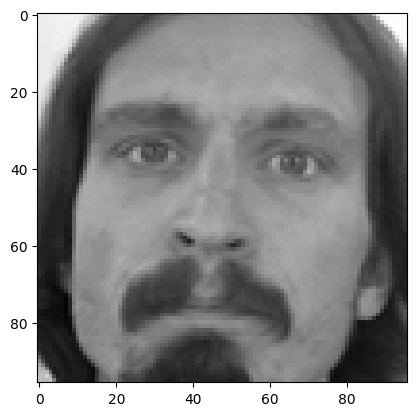

In [ ]:
plt.imshow(X_train[0].reshape(96,96), cmap='gray')
plt.show()

Separate labels (right eye position, left eye position, etc...) and store in array for training

In [ ]:
train_labels = train.drop('Image', axis = 1)

Y_train = []
for i in range(0, 7049):
  y = train_labels.iloc[i, :]
  Y_train.append(y)

Y_train = np.array(Y_train, dtype = 'float')

Import model training packages

In [ ]:
from keras.layers import Conv2D, Dropout, Dense, Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                      Dense(128, activation="relu"),
                      Dropout(0.1),
                      Dense(64, activation="relu"),
                      Dense(30)
                      ])

In [ ]:
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 96, 96, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 96, 96, 32)        128       
 chNormalization)                                     

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 256, validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 330s 14s/step - loss: 358.0965 - mae: 12.2214 - val_loss: 779.1642 - val_mae: 25.8168
Epoch 2/50
23/23 [==============================] - 321s 14s/step - loss: 33.5506 - mae: 4.5047 - val_loss: 225.5951 - val_mae: 13.6339
Epoch 3/50
23/23 [==============================] - 331s 14s/step - loss: 26.6939 - mae: 3.9937 - val_loss: 58.4694 - val_mae: 6.8343
Epoch 4/50
23/23 [==============================] - 325s 14s/step - loss: 23.8702 - mae: 3.7645 - val_loss: 95.0550 - val_mae: 8.9049
Epoch 5/50
23/23 [==============================] - 327s 14s/step - loss: 22.3458 - mae: 3.6285 - val_loss: 52.0395 - val_mae: 6.3788
Epoch 6/50
23/23 [==============================] - 326s 14s/step - loss: 20.3482 - mae: 3.4388 - val_loss: 39.8394 - val_mae: 5.5090
Epoch 7/50
23/23 [==============================] - 321s 14s/step - loss: 19.1268 - mae: 3.3449 - val_loss: 56.6835 - val_mae: 6.6855
Epoch 8/50
23/23 [==============================] - 323s

In [ ]:
model.save_weights('weights.h5')

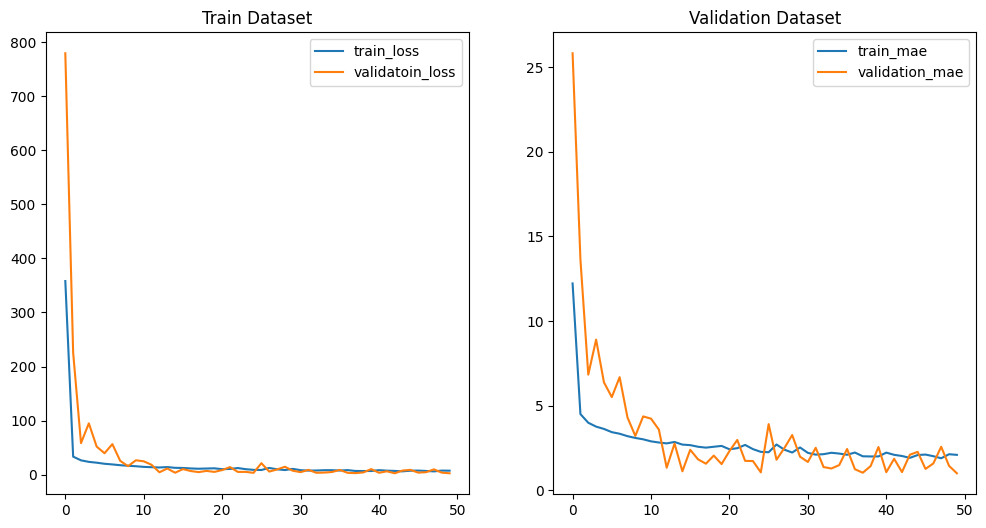

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train Dataset')
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validatoin_loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Dataset')
plt.plot(history.history['mae'],label='train_mae')
plt.plot(history.history['val_mae'],label='validation_mae')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [ ]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]

    timag.append(timg)

In [ ]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1)

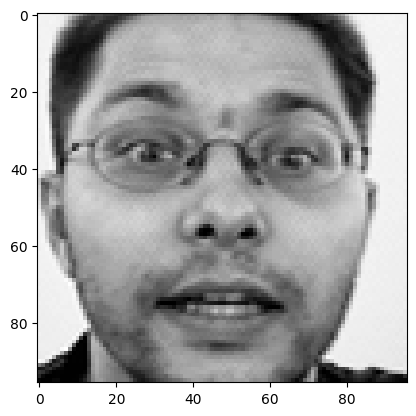

In [ ]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

In [ ]:
pred = model.predict(X_test)

56/56 [==============================] - 24s 412ms/step


In [ ]:
print(pred)

[[68.37966  36.727493 28.876215 ... 71.093346 49.008236 85.583015]
 [69.21458  37.40975  28.859762 ... 75.82994  50.095016 86.564354]
 [67.93452  37.48108  31.100718 ... 74.47915  50.05215  85.862785]
 ...
 [67.36162  40.518356 31.09103  ... 76.04476  45.827366 78.288994]
 [62.319675 36.944386 29.776083 ... 75.8124   45.17279  72.62076 ]
 [67.816246 39.45927  30.935535 ... 76.79983  47.348545 79.10594 ]]


In [ ]:
def plot_features(image,feature_names,features_reshaped):
    """
    Function that marks all the facial keypoints on the image with an explanatory
    legend.
    """
    #image=cv2.flip(image,1)
    NUM_COLORS = 15
    cm = plt.get_cmap('gist_rainbow')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    ax.imshow(image, cmap='gray')
    for n, name in enumerate(feature_names):
        ax.scatter(features_reshaped[0,n,0],features_reshaped[0,n,1],marker='x',label=name)
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

In [ ]:
features=train.columns[:-1]
feature_names=[i.replace('_x','') for n,i in enumerate(features) if n%2==0 ]


In [ ]:
print(feature_names)

['left_eye_center', 'right_eye_center', 'left_eye_inner_corner', 'left_eye_outer_corner', 'right_eye_inner_corner', 'right_eye_outer_corner', 'left_eyebrow_inner_end', 'left_eyebrow_outer_end', 'right_eyebrow_inner_end', 'right_eyebrow_outer_end', 'nose_tip', 'mouth_left_corner', 'mouth_right_corner', 'mouth_center_top_lip', 'mouth_center_bottom_lip']


In [ ]:
x_test_reshaped=pred.reshape(len(pred),15,2)
plot_features(X_test[np.random.choice(len(X_test))],feature_names,x_test_reshaped)

NameError: ignored